In [3]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import os


from sklearn.model_selection import train_test_split
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
Thickness = pd.read_csv('./data/Thickness.csv')
Thickness = Thickness.drop([33]) # 9-1 drop
Thickness.reset_index(drop=True, inplace=True)

top_path = './data/box_img/Top/'
bot_path = './data/box_img/Bot/'

top_path_list = [f'./data/box_img/Top/Top_{i}.jpg' for i in range(0, 127)]
bot_path_list = [f'./data/box_img/Bot/Bot_{i}.jpg' for i in range(0, 127)]

In [4]:
Thickness

,Thickness
0,48.266667
1,47.966667
2,48.166667
3,48.600000
4,59.533333
...,...
122,84.633333
123,98.366667
124,97.033333
125,96.266667


In [5]:
Top_transformed_list = []
for i in range(len(bot_path_list)):
    Bot_transformed = np.array(Image.open(bot_path_list[i]))/np.array(Image.open(bot_path_list[0])) #Ref image(bot) i번째를 첫번째로 나누어서 Weight 값 생성
    Top_transformed = (np.array(Image.open(top_path_list[i])))*Bot_transformed #Weight 값과 Top image(top) i번째를 곱하여 Weighted image 생성(보정)
    Top_transformed_list.append(Top_transformed) #Weighted image를 리스트에 추가

Bot_transformed 0번째 weight는 1이라 변동이 없어야하는것 아닌가?
weight가 있는 것으로 판단됨

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


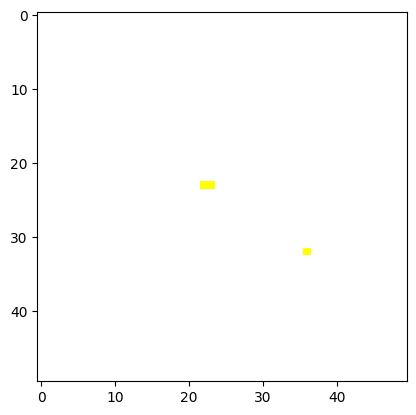

In [6]:
plt.imshow(Top_transformed_list[0])

In [7]:
Top_transformed_list[0]

array([[[12., 11.,  7.],
        [13., 12.,  8.],
        [14., 13.,  9.],
        ...,
        [17., 16., 14.],
        [12., 11.,  7.],
        [12., 11.,  7.]],

       [[12., 11.,  7.],
        [12., 11.,  7.],
        [13., 12.,  8.],
        ...,
        [18., 17., 15.],
        [13., 12.,  8.],
        [13., 12.,  8.]],

       [[12., 11.,  7.],
        [12., 11.,  7.],
        [11., 10.,  6.],
        ...,
        [18., 17., 15.],
        [15., 14., 10.],
        [15., 14., 10.]],

       ...,

       [[13., 13., 13.],
        [10., 10., 10.],
        [ 8.,  8.,  8.],
        ...,
        [12., 11.,  7.],
        [13., 12.,  7.],
        [13., 12.,  7.]],

       [[10., 10.,  8.],
        [ 9.,  9.,  7.],
        [ 9.,  9.,  7.],
        ...,
        [13., 12.,  8.],
        [14., 13.,  8.],
        [12., 11.,  6.]],

       [[10., 10.,  8.],
        [ 9.,  9.,  7.],
        [ 9.,  9.,  7.],
        ...,
        [13., 12.,  8.],
        [10.,  9.,  4.],
        [ 8.,  7.,  2.]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


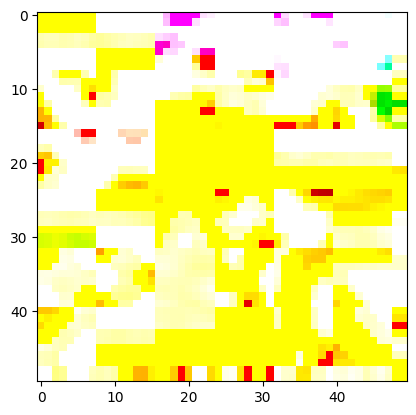

In [8]:
plt.imshow(Top_transformed_list[4])

Bot_transformed까지는 모두 1이 나와서 정상

In [9]:
Top_transformed_list = []
for i in range(len(bot_path_list)):
    Bot_transformed = np.array(Image.open(bot_path_list[i]))/np.array(Image.open(bot_path_list[0])) #Ref image(bot) i번째를 첫번째로 나누어서 Weight 값 생성
    if i== 0:
        np.set_printoptions(threshold=np.inf)
        print(Bot_transformed)
        not_one = Bot_transformed[Bot_transformed != 1]
        print(f"not one : {not_one}")
    Top_transformed = np.array(Image.open(top_path_list[i]))*Bot_transformed #Weight 값과 Top image(top) i번째를 곱하여 Weighted image 생성(보정)
    # if i== 0:
    #     np.set_printoptions(threshold=np.inf)
    #     print(Top_transformed)
    Top_transformed_list.append(Top_transformed) #Weighted image를 리스트에 추가

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1

#### 결론
0번째 사진에 Top_transformed(weight값이 적용된 배열) 과 top_path_list[k](원본 배열) 같은지 비교한 결과
두 배열은 같은걸로 판단됨

아마 plt.imshow할 때 다음 과정이 진행됩니다. <br>
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<br>clipping할 때 20, 21값이 다른 값으로 변환되서 그런듯함.

In [10]:
Top_transformed_list = []
for k in range(len(bot_path_list)):
    Bot_transformed = np.array(Image.open(bot_path_list[k]))/np.array(Image.open(bot_path_list[0])) #Ref image(bot) i번째를 첫번째로 나누어서 Weight 값 생성
    Top_transformed = (np.array(Image.open(top_path_list[k])))*Bot_transformed #Weight 값과 Top image(top) i번째를 곱하여 Weighted image 생성(보정)
    
    if k== 0:
        Original_img = np.array(Image.open(top_path_list[k]))
        if np.array_equal(Top_transformed, Original_img):
            print(f'Image {k} is identical.')
        else:
            print(f'Image {k} is different.')
    Top_transformed_list.append(Top_transformed) #Weighted image를 리스트에 추가


Image 0 is identical.


In [11]:
print(Top_transformed_list[0])

[[[12. 11.  7.]
  [13. 12.  8.]
  [14. 13.  9.]
  [15. 14. 10.]
  [14. 13.  9.]
  [12. 11.  7.]
  [ 9.  8.  4.]
  [ 8.  7.  3.]
  [ 8.  7.  3.]
  [ 9.  8.  4.]
  [11. 10.  6.]
  [12. 11.  7.]
  [13. 12.  8.]
  [12. 11.  7.]
  [11. 10.  6.]
  [11. 10.  6.]
  [14. 13. 11.]
  [14. 13. 11.]
  [13. 12. 10.]
  [12. 11.  9.]
  [13. 12. 10.]
  [14. 13. 11.]
  [16. 15. 13.]
  [17. 16. 14.]
  [13. 12. 10.]
  [12. 11.  9.]
  [10.  9.  7.]
  [10.  9.  7.]
  [11. 10.  8.]
  [11. 10.  8.]
  [10.  9.  7.]
  [ 8.  7.  5.]
  [ 9.  8.  6.]
  [10.  9.  7.]
  [12. 11.  9.]
  [13. 12. 10.]
  [14. 13. 11.]
  [14. 13. 11.]
  [13. 12. 10.]
  [12. 11.  9.]
  [ 8.  7.  5.]
  [ 9.  8.  6.]
  [11. 10.  8.]
  [13. 12. 10.]
  [14. 13. 11.]
  [16. 15. 13.]
  [17. 16. 14.]
  [17. 16. 14.]
  [12. 11.  7.]
  [12. 11.  7.]]

 [[12. 11.  7.]
  [12. 11.  7.]
  [13. 12.  8.]
  [13. 12.  8.]
  [13. 12.  8.]
  [12. 11.  7.]
  [11. 10.  6.]
  [10.  9.  5.]
  [ 9.  8.  4.]
  [10.  9.  5.]
  [11. 10.  6.]
  [12. 11.  7.]
  [12.

### Q. 이미지 픽셀 값이 다 다른데 기준으로 두려면 weight를 평균내서 나눠줘야지 않을까?

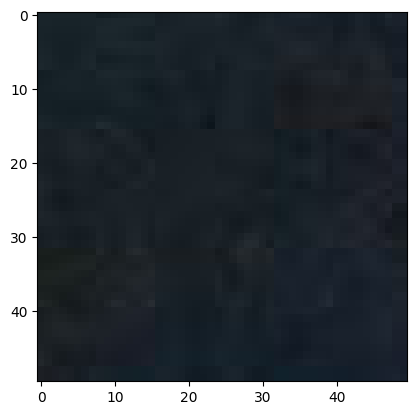

In [17]:
bottom_box =Image.open(bot_path_list[3])
plt.imshow(bottom_box)

### trial 1

In [13]:
Thickness = pd.read_csv('./data/Thickness.csv')
Thickness = Thickness.drop([33]) # 9-1 drop
Thickness.reset_index(drop=True, inplace=True)

top_path = './data/box_img/Top/'
bot_path = './data/box_img/Bot/'

top_path_list = [f'./data/box_img/Top/Top_{i}.jpg' for i in range(0, 127)]
bot_path_list = [f'./data/box_img/Bot/Bot_{i}.jpg' for i in range(0, 127)]

In [14]:
Thickness

,Thickness
0,48.266667
1,47.966667
2,48.166667
3,48.600000
4,59.533333
...,...
122,84.633333
123,98.366667
124,97.033333
125,96.266667


In [4]:
Top_transformed_list = []
for i in range(len(bot_path_list)):
    Bot_transformed = np.array(Image.open(bot_path_list[i]))/np.array(Image.open(bot_path_list[0])) #Ref image(bot) i번째를 첫번째로 나누어서 Weight 값 생성
    Top_transformed = np.array(Image.open(top_path_list[i]))*Bot_transformed #Weight 값과 Top image(top) i번째를 곱하여 Weighted image 생성(보정)
    Top_transformed_list.append(Top_transformed) #Weighted image를 리스트에 추가